# Analysis of worldwide food consumption and related CO2 emissions (hypothesis testing and permutation test)

In [10]:
# Import the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Exploratory analysis

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions.

In [11]:
# load food_consumption.csv to a DataFrame named food
food = pd.read_csv(r"..\food_consumption.csv")

# check the DF
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [12]:
# show a sample of the food DF
food.sample(10)

,country,food_category,consumption,co2_emission
1040,Namibia,dairy,73.05,104.05
601,Czech Republic,wheat,92.67,17.67
149,Finland,dairy,430.76,613.57
423,Russia,eggs,15.43,14.17
527,Turkey,nuts,7.97,14.11
1277,Rwanda,poultry,1.34,1.44
1375,Sierra Leone,pork,1.22,4.32
474,New Caledonia,poultry,44.36,47.65
955,Grenada,soybeans,0.01,0.00
1353,Mozambique,pork,5.13,18.16


In [13]:
# check the unique values in food_category
food['food_category'].unique()

array(['pork', 'poultry', 'beef', 'lamb_goat', 'fish', 'eggs', 'dairy',
       'wheat', 'rice', 'soybeans', 'nuts'], dtype=object)

In [14]:
# check the unique values in country
food['country'].unique()

array(['Argentina', 'Australia', 'Albania', 'Iceland', 'New Zealand',
       'USA', 'Uruguay', 'Luxembourg', 'Brazil', 'Kazakhstan', 'Sweden',
       'Bermuda', 'Denmark', 'Finland', 'Ireland', 'Greece', 'France',
       'Canada', 'Norway', 'Hong Kong SAR. China', 'French Polynesia',
       'Israel', 'Switzerland', 'Netherlands', 'Kuwait', 'United Kingdom',
       'Austria', 'Oman', 'Italy', 'Bahamas', 'Portugal', 'Malta',
       'Armenia', 'Slovenia', 'Chile', 'Venezuela', 'Belgium', 'Germany',
       'Russia', 'Croatia', 'Belarus', 'Spain', 'Paraguay',
       'New Caledonia', 'South Africa', 'Barbados', 'Lithuania', 'Turkey',
       'Estonia', 'Mexico', 'Costa Rica', 'Bolivia', 'Ecuador', 'Panama',
       'Czech Republic', 'Romania', 'Colombia', 'Maldives', 'Cyprus',
       'Serbia', 'United Arab Emirates', 'Algeria', 'Ukraine', 'Pakistan',
       'Swaziland', 'Latvia', 'Bosnia and Herzegovina', 'Fiji',
       'South Korea', 'Poland', 'Saudi Arabia', 'Botswana', 'Macedonia',
       '

In [15]:
# show a descriptive statistics about the consumption for each food_category, ordered by the median value
food.groupby('food_category')['consumption'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
wheat,130.0,71.549538,44.191318,2.74,37.0450,69.420,103.3725,197.50
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03


In [16]:
# Which `food_category` has the highest median value of `food_consumption`?
highest_median = food.groupby('food_category')['consumption'].describe().sort_values(by='50%', ascending=False).head(1)

# print the results
print(f"The food_category that has the highest median value ({highest_median.loc[highest_median.index[0],'50%']}) of food_consumption is {highest_median.index[0]}")

The food_category that has the highest median value (110.975) of food_consumption is dairy


As shows in the following boxplot, the food_category that has the highest IQR is beef


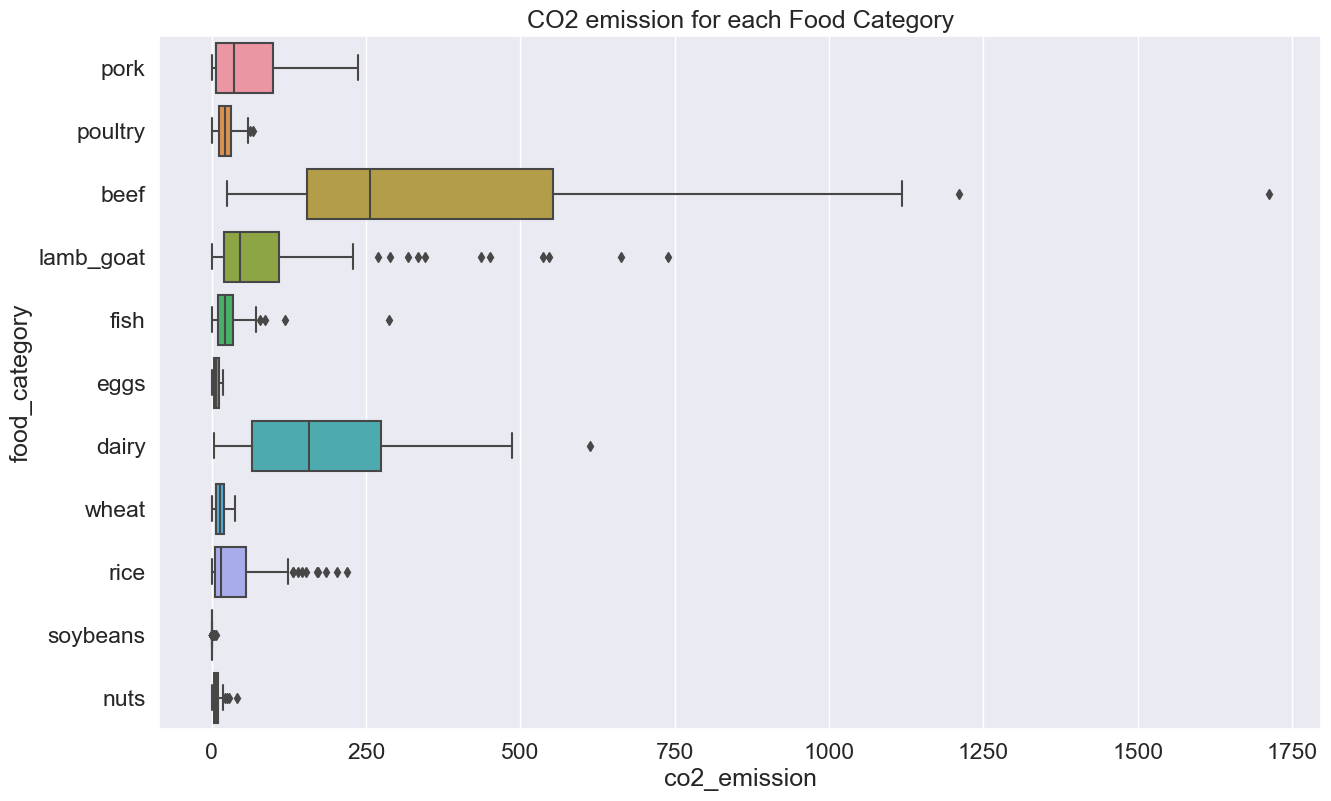

In [17]:
# plot a boxplot that shows co2_emission for each food_category
sns.boxplot(data=food, x='co2_emission', y='food_category')
plt.title('CO2 emission for each Food Category')

# print the observation
print("As shows in the following boxplot, the food_category that has the highest IQR is beef")

In [18]:
# print the observation
print("As shows in the previous boxplot, the food_category that has the highest median CO2 emission value is beef")

As shows in the previous boxplot, the food_category that has the highest median CO2 emission value is beef


In [20]:
# create a new DataFrame that contains only the datas of poultry and fish consumption
food_test = food[food['food_category'].isin(['poultry','fish'])]

# check if the boolean masking correctly ran
food_test['food_category'].unique()

array(['poultry', 'fish'], dtype=object)

In [21]:
# show the info of the new DF food_test
food_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 1423
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        260 non-null    object 
 1   food_category  260 non-null    object 
 2   consumption    260 non-null    float64
 3   co2_emission   260 non-null    float64
dtypes: float64(2), object(2)
memory usage: 10.2+ KB


In [22]:
# check if poultry and fish food_categories have the same number of observations
food_test.groupby(['food_category'], as_index=False).agg({'consumption': ['count', np.mean]})

food_category consumption           
                      count       mean
0          fish         130  17.287077
1       poultry         130  21.219231

In [26]:
# define the test statistic (mean_diff)
mean_poultry = np.mean(food_test[food_test['food_category'] == 'poultry']['consumption'])
mean_fish = np.mean(food_test[food_test['food_category'] == 'fish']['consumption'])

mean_diff = mean_poultry - mean_fish

print(f"Test statistic = {round(mean_diff, 2)}")

Test statistic = 3.93


In [27]:
# define the hipotesis (the null hypothesis is that there's no difference between the two means)
H0 = "mean_test < mean_diff"
H1 = "mean_test >= mean_diff"

# define the sample significant level (alpha)

alpha = 0.05

In [28]:
# run a permutation test to verify if the mean_diff observed is statistically significant
n = 10000
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = food_test.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(food_test.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = food_test.loc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['consumption']) - np.mean(df_sample2['consumption'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

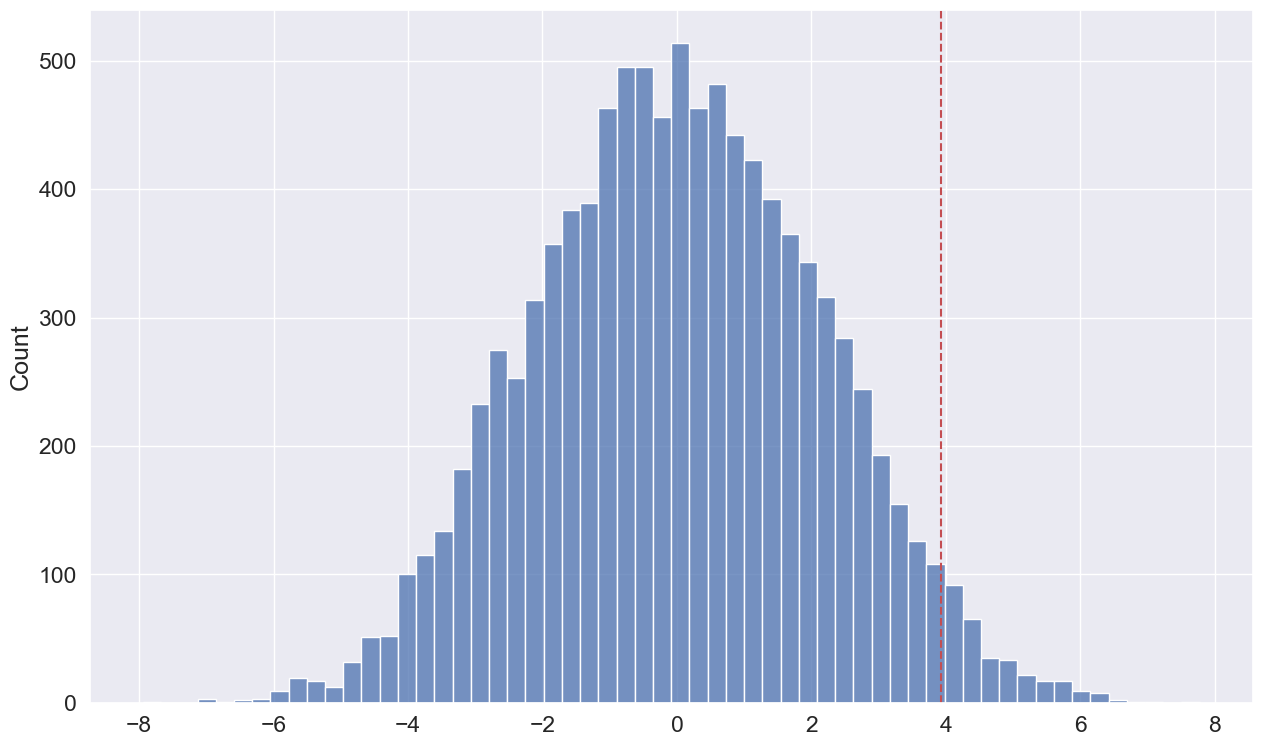

The test statistic is: 3.93


In [29]:
# show the histogram of the permutation test
sns.histplot(mu_diff_samples)
plt.axvline(mean_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('The test statistic is:', round(mean_diff, 2))

In [30]:
# calculate the p_value and show it
print('Values more extreme than observed:', sum([el >= mean_diff for el in mu_diff_samples]))
p_value = sum([el > mean_diff for el in mu_diff_samples])/n
print('p-value:', p_value)

Values more extreme than observed: 322
p-value: 0.0322


In [31]:
# check if the p_value is <= alpha and show if H0 is rejected or accepted
if p_value <= alpha: 
    print('p-value <= alpha | the observed result is statistically significant | H0 rejected')
else: 
    print('p-value > alpha | the observed result is not statistically significant | H0 accepted')

p-value <= alpha | the observed result is statistically significant | H0 rejected


# Conclusions of the analysis

__The difference in average consumption between poultry and fish__ within the sample may seem significant and, by performing a permutation test, I can confirme that __it is statistically significant__.